In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
session = fastf1.get_session(2024, 5, 'R')
session.load(telemetry=False, weather=False)
laps = session.laps.pick_quicklaps()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/dang032003/.cache/fastf1.
	Size: 489.24 MB
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']


In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
#team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'Ferrari', 'Aston Martin', 'Mercedes', 'McLaren',
       'Alpine', 'Haas F1 Team', 'Kick Sauber', 'Williams', 'RB'],
      dtype='object', name='Team')


In [4]:
# make a color palette associating team names to hex codes
team_palette = {}
for team in team_order:
    try:
        team_palette[team] = fastf1.plotting.team_color(team)
    except KeyError:
        team_palette[team] = '#000000'  # Default color (black) if team color not found

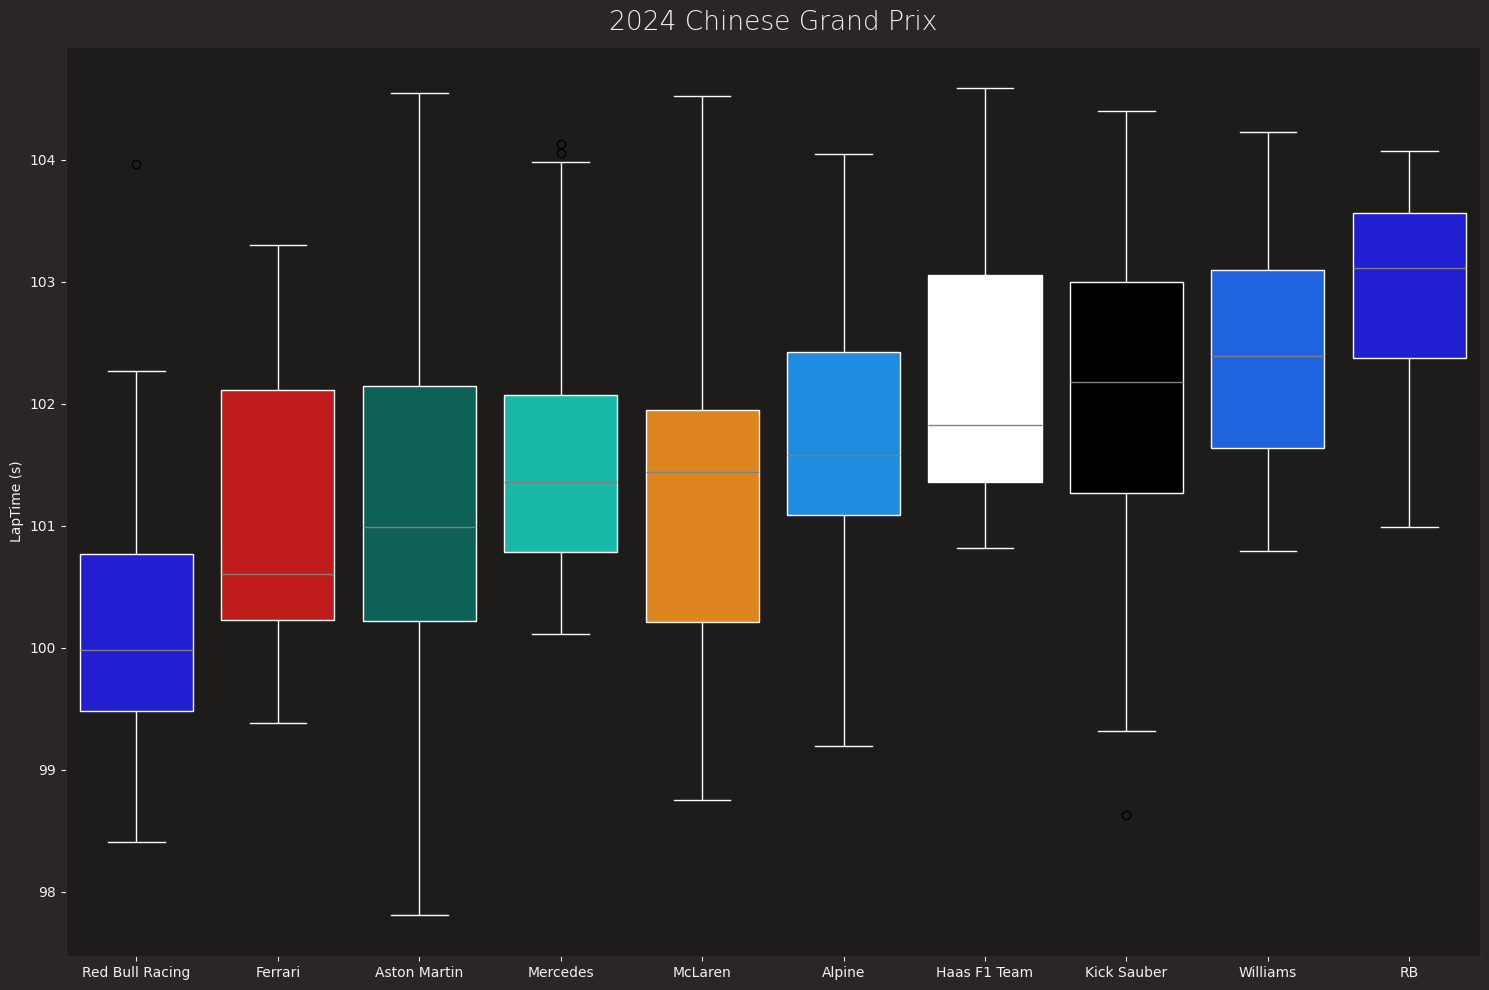

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Chinese Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()